In [ ]:
#Import the necessary libraries. 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42) 
amazon = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/amazon_toy_sample_clean.csv", encoding="ISO-8859-1") # USE YOUR OWN GITHUB PATH HERE
amazon.dropna(inplace=True)
amazon.head()


,uniq_id,product_name,manufacturer,price,number_available_in_stock,status,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews
0,dafc6b4ba4b4a3e7b4ff83402a196ae8,Dinosaur Eggs,Halsall,0.29,3,new,3,2,4.0,Figures & Playsets > Dinosaurs,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,Manufacturer's Description not available,Technical Details Item Weight82 g Product Dime...,Not available,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,None,Fascinating fun // 4.0 // 25 Nov. 2008 // By\n...
1,ba85fb9368114fce646379ed12750a5f,Neopets 4 Trading Card Fun Packs (2 Bonus Cards),Neopets,0.38,2,new,2,1,4.5,Hobbies > Trading Cards & Accessories > Packs ...,Unknown,Manufacturer's Description not available,Technical Details Item Weight454 g Product Dim...,Not available,Not available,None,Never Too Old // 4.0 // 6 Nov. 2013 // By\n ...
2,14e24c29ba38c2717754baa2638f242a,"Latex Assorted Water Balloons, Pack of 40",Unique Party,0.39,7,new,2,1,4.5,Party Supplies > Decorations > Balloons,http://www.amazon.co.uk/Latex-Cannonball | htt...,Colour Name:Assorted Bold | Size Name:Pack o...,Technical Details Item Weight222 g Product Dim...,Colour Name:Assorted Bold | Size Name:Pack o...,http://www.amazon.co.uk/Water-Bombs-Pack-100-A...,None,Great item // 4.0 // 27 Dec. 2015 // By\n \...
4,7b72f597db5d74d35c4f91ef69708cf1,4 Packs of Mini Colouring Pencils (4 pencils i...,unisex party bag fillers,0.60,7,new,21,1,4.3,Arts & Crafts > Colouring Pencils,http://www.amazon.co.uk/12-Mini-Christmas-Colo...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,Technical Details Item Weight59 g Product Dime...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,http://www.amazon.co.uk/20-Packs-Wax-Crayons-P...,How many packs in the box. // I got four Mimi ...,Well made and presented // 4.0 // 6 April 2015...
5,7b8a04095b5e4984c57fd45eb327feb1,100 Deep Red Rose Silk Petals Confetti - Weddi...,Shatchi,0.64,6,new,10,2,4.1,"Party Supplies > Banners, Stickers & Confetti ...",http://www.amazon.co.uk/Valentines | http://ww...,Pack of 100 Deep Red Silk Rose Petals Luxury s...,Technical Details Manufacturer recommended age...,Pack of 100 Deep Red Silk Rose Petals Luxury s...,http://www.amazon.co.uk/300-Deep-Silk-Rose-Pet...,None,Five Stars // 5.0 // 2 Dec. 2015 // By\n \n...


In [ ]:
amazon2 = amazon[['price','number_available_in_stock','number_of_reviews','number_of_answered_questions','average_review_rating_of_5']]

In [ ]:
amazon2.head()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating_of_5
0,0.29,3,3,2,4.0
1,0.38,2,2,1,4.5
2,0.39,7,2,1,4.5
4,0.60,7,21,1,4.3
5,0.64,6,10,2,4.1


In [ ]:
buckets = [ 0, 2, 4, 5]
bucketlabels = ['Low', 'Medium', 'High']

# Using cut() to separate data into the buckets we have built
amazon2['buckets'] = pd.cut(amazon2['average_review_rating_of_5'] , bins=buckets, labels=bucketlabels, include_lowest=True)

# Check if we have the new attribute 'buckets' at the end of our dataset
amazon2.head()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,buckets
0,0.29,3,3,2,4.0,Medium
1,0.38,2,2,1,4.5,High
2,0.39,7,2,1,4.5,High
4,0.60,7,21,1,4.3,High
5,0.64,6,10,2,4.1,High


In [ ]:
amazon3 = amazon2[['price','number_available_in_stock','number_of_reviews','number_of_answered_questions','buckets']]

In [ ]:
from sklearn.model_selection import train_test_split
x=amazon3.iloc[:,:4] 
y=amazon3['buckets'] 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (5049, 4)
X_test shape: (1263, 4)


In [ ]:
rf = RandomForestClassifier()
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [ ]:

rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
print(y_pred) 

['High' 'High' 'High' ... 'High' 'High' 'High']


In [ ]:
accuracy_score(y_test, y_pred)

0.8456057007125891

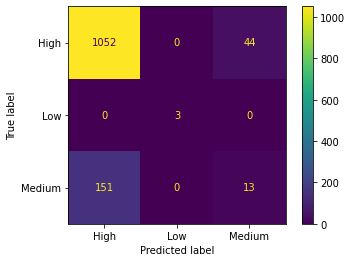

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)

In [ ]:

import sklearn.metrics as metrics
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, y_pred, labels=['Low', 'Medium', 'High']))

              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         3
      Medium       0.23      0.08      0.12       164
        High       0.87      0.96      0.92      1096

    accuracy                           0.85      1263
   macro avg       0.70      0.68      0.68      1263
weighted avg       0.79      0.85      0.81      1263



In [ ]:
n_estimators = 1000
min_samples_split = 5 
criterion='entropy' 

In [ ]:
rf2 = RandomForestClassifier(verbose=1, n_estimators=n_estimators, min_samples_split=min_samples_split, criterion=criterion)
rf2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.7s finished


RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=1000, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8653998416468726


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished


              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         3
      Medium       0.38      0.05      0.10       164
        High       0.87      0.99      0.93      1096

    accuracy                           0.87      1263
   macro avg       0.75      0.68      0.67      1263
weighted avg       0.81      0.87      0.82      1263



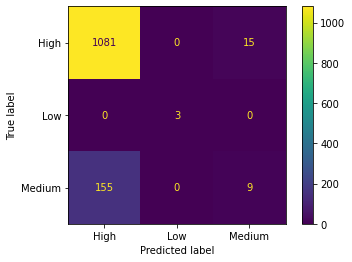

In [ ]:
# Testing and predicting
y_pred = rf2.predict(X_test)

print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(rf2, X_test, y_test)
print(metrics.classification_report(y_test, y_pred, labels=['Low', 'Medium', 'High']))

In [ ]:
#after comparing both the models 100 trees and 1000 trees, i feel that building 100 tree model is better. As building a 1000 tree model consumes the process and also the outcomes of both the models are mostly relatable or identical.  